<a href="https://colab.research.google.com/github/devanshdhir2/topsis-to-find-best-pretrained-model-for-Text-Conversational/blob/main/Topsis_convo_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read Input Data
# The CSV file (input.csv) should have the following columns:
# Model, BLEU, Rouge-L, Coherence Score, Rouge-1, Response Length
df = pd.read_csv('input.csv')

In [6]:
# 2. Setup TOPSIS Parameters

# Define the criteria (all metrics are assumed to be benefit criteria)
criteria = ['BLEU', 'Rouge-L', 'Coherence Score', 'Rouge-1', 'Response Length']

# Define weights for each criterion (equal weighting in this example)
weights = np.array([1/len(criteria)] * len(criteria))

In [7]:
# 3. TOPSIS Method Implementation
# Step 1: Construct the decision matrix X (convert to float for computation)
X = df[criteria].values.astype(float)

# Step 2: Normalize the decision matrix using Euclidean norm
norm_X = X / np.sqrt((X**2).sum(axis=0))

# Step 3: Calculate the weighted normalized decision matrix
weighted_norm = norm_X * weights

# Step 4: Determine the ideal best (A+) and ideal worst (A-)
# (Since all criteria are benefit criteria, A+ is the maximum and A- is the minimum in each column.)
ideal_best = np.max(weighted_norm, axis=0)
ideal_worst = np.min(weighted_norm, axis=0)

# Step 5: Calculate the Euclidean distance of each alternative from A+ and A-
D_positive = np.sqrt(((weighted_norm - ideal_best) ** 2).sum(axis=1))
D_negative = np.sqrt(((weighted_norm - ideal_worst) ** 2).sum(axis=1))

# Step 6: Calculate the TOPSIS score (relative closeness to the ideal solution)
scores = D_negative / (D_positive + D_negative)

# Add the TOPSIS scores to the dataframe
df['TOPSIS Score'] = scores

# Step 7: Rank the models based on the TOPSIS score (higher score = better rank)
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)


In [8]:
# 4. Save the Results
df.to_csv('topsis_output.csv', index=False)
print("Output saved to 'topsis_output.csv'.")


Output saved to 'topsis_output.csv'.


<ipython-input-9-19c144f8d139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='TOPSIS Score', data=df, palette='viridis')


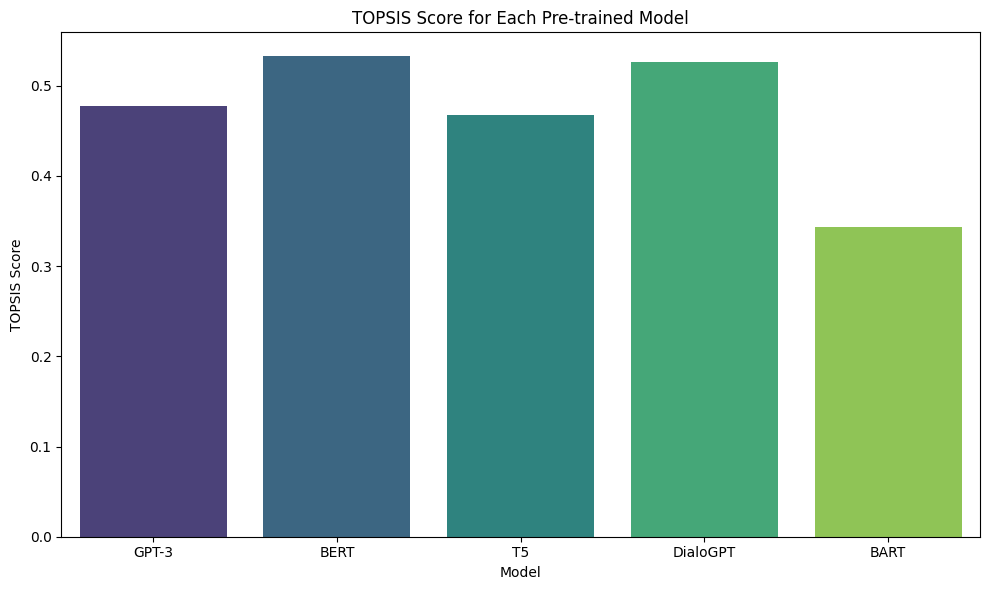

In [9]:
# 5. Visualize the TOPSIS Scores

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='TOPSIS Score', data=df, palette='viridis')
plt.title('TOPSIS Score for Each Pre-trained Model')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.tight_layout()
plt.savefig('topsis_scores.png')
plt.show()
